In [583]:
#options(repos='http://cran.md.tsukuba.ac.jp')
#options(repos='http://R.research.att.com/')
# install.packages('vegan')
#install.packages("corrplot")

## 0.「文書-抽出語」表を読み込む

In [584]:
d <- NULL
d <- read.table("export.csv", header=T, sep=",")

d[d$'h5'<=5000, 1] <- "A_レジャー"
d[d$'h5'>=5001 & d$'h5'<=10000, 1] <- "B_ビジネス"
d[d$'h5'<=1000, 2] <- "01_登別"
d[d$'h5'>=1001 & d$'h5'<= 2000, 2] <- "02_草津"
d[d$'h5'>=2001 & d$'h5'<= 3000, 2] <- "03_箱根"
d[d$'h5'>=3001 & d$'h5'<= 4000, 2] <- "04_道後"
d[d$'h5'>=4001 & d$'h5'<= 5000, 2] <- "05_湯布院"
d[d$'h5'>=5001 & d$'h5'<= 6000, 2] <- "06_札幌"
d[d$'h5'>=6001 & d$'h5'<= 7000, 2] <- "07_名古屋"
d[d$'h5'>=7001 & d$'h5'<= 8000, 2] <- "08_東京"
d[d$'h5'>=8001 & d$'h5'<= 9000, 2] <- "09_大阪"
d[d$'h5'>=9001 & d$'h5'<=10000, 2] <- "10_福岡"

d<-d[,c(1:2,11:ncol(d))]
names(d)[1] <- "カテゴリー"
names(d)[2] <- "エリア" 
d[1:10,1:10]

カテゴリー,エリア,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント
A_レジャー,01_登別,1,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0


## 1. 多次元尺度構成法

### (a)「抽出語-文書」表 に転置する

In [585]:
d.t <- t(d[,3:ncol(d)])
d.t[1:10,1:10]

部屋,1,0,0,0,0,0,0,0,0,0
ホテル,0,0,0,0,0,0,0,0,0,0
風呂,0,0,0,0,0,1,0,1,0,0
温泉,0,0,0,0,0,0,0,0,0,0
お部屋,0,0,0,0,0,0,0,0,0,0
スタッフ,0,0,0,0,0,0,0,0,0,0
立地,0,0,0,0,0,0,0,0,0,0
フロント,0,0,0,0,0,0,0,0,0,0
最高,0,0,0,0,0,1,0,0,0,0
浴場,0,0,0,0,0,0,0,0,0,0


### 距離を計算する (ユークリッド距離)

In [586]:
ed <- dist(d.t, method="binary")

### (b) 多次元尺度構成法で2次元プロットする

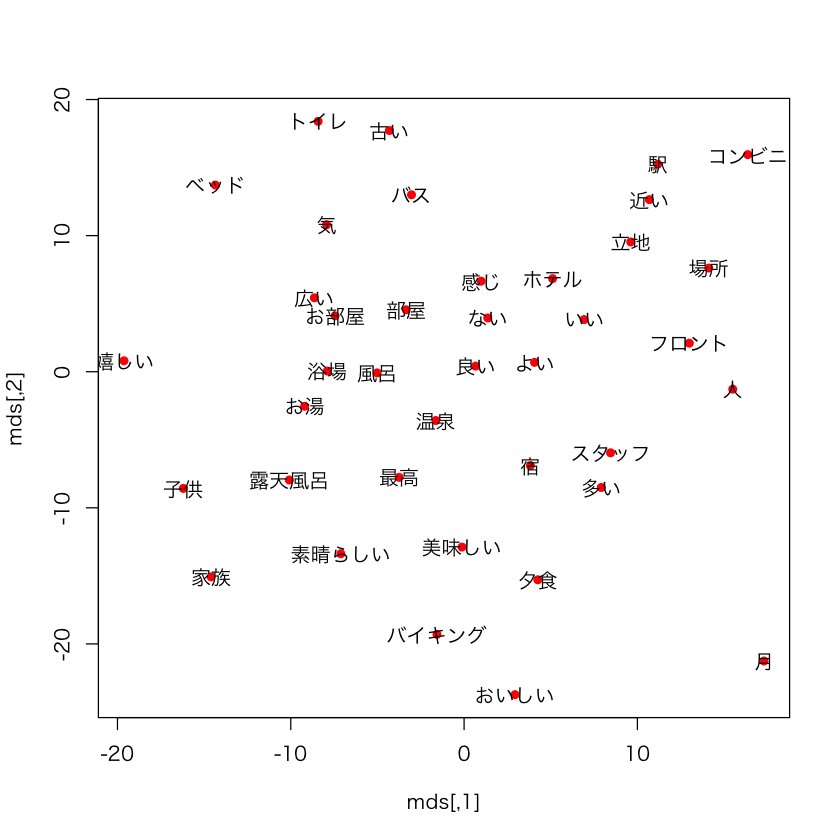

In [587]:
library("MASS")
mds <- isoMDS(ed, maxit=3000, tol=0.000001, trace=F)$points
par(family = "HiraKakuProN-W3")
plot(mds, col="red", pch=16)
text(mds, rownames(mds))

## 2. 対応分析

### (a)「抽出語-文書」表 を確認する

In [588]:
d[1:10,1:10]

カテゴリー,エリア,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント
A_レジャー,01_登別,1,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0


### (b) 対応分析で2次元プロットする

In [589]:
d0 <- aggregate(d[,3:ncol(d)], by=list(name=d$"カテゴリー"), sum)
row.names(d0) <- d0$name; d0$name <- NULL
d1 <- aggregate(d[,3:ncol(d)], by=list(name=d$"エリア"), sum)
row.names(d1) <- d1$name; d1$name <- NULL

table.N <- d0;
table.N <- rbind(table.N, d1)

In [590]:
# Observed counts
table.N[,1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,2723,1157,2113,1657,1095,1014,531,436,691,518
B_ビジネス,2340,1839,668,85,419,455,812,806,222,383
01_登別,541,251,429,280,168,198,49,123,128,119
02_草津,532,290,493,469,236,173,160,81,157,95
03_箱根,621,250,476,301,283,267,65,89,130,136
04_道後,464,284,216,319,120,118,170,104,79,100
05_湯布院,565,82,499,288,288,258,87,39,197,68
06_札幌,503,351,131,24,77,95,168,161,49,95
07_名古屋,454,377,141,14,80,70,135,164,39,71
08_東京,431,350,106,2,91,98,157,151,41,83


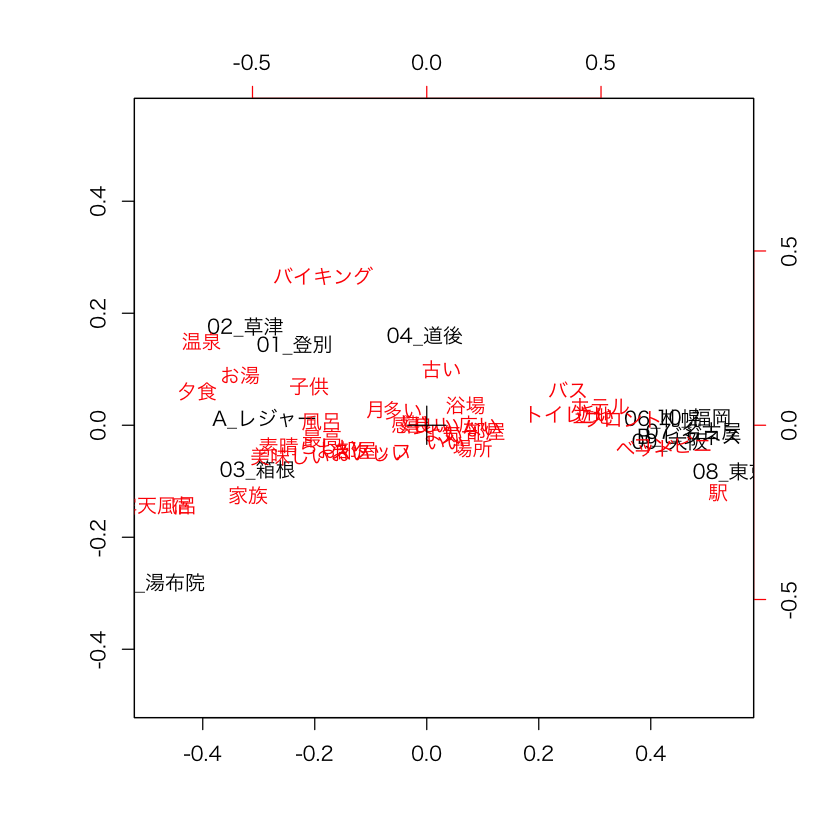

In [593]:
library(MASS)
d_max <- min(nrow(table.N), ncol(table.N)) - 1
c <- corresp(table.N, nf=d_max)
par(family = "HiraKakuProN-W3")
biplot(c)

### (c) イナーシャ(慣性)を確認する

In [596]:
k <- c$cor^2
inertias <- round(k,4)  # イナーシャ(慣性)
k <- round(100*k / sum(k), 2)
inertias
k

[1] 0.1426 0.0107 0.0061 0.0022 0.0014 0.0010 0.0006 0.0006 0.0002 0.0000
[11] 0.0000

[1] 86.14  6.46  3.71  1.36  0.84  0.63  0.39  0.34  0.14  0.00  0.00

## 3. 対応分析 (手動)

In [608]:
# row sum
row.sum <- apply(table.N, 1, sum)

# col sum
col.sum <- apply(table.N, 2, sum)

# Grand total
n <- sum(table.N)

In [609]:
# Expected counts
expected <- outer(row.sum, col.sum) / sum(table.N)
round(expected, 2)[1:10, 1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,3132.00,1853.34,1720.34,1077.61,936.57,908.73,830.79,768.31,564.79,557.36
B_ビジネス,1931.00,1142.66,1060.66,664.39,577.43,560.27,512.21,473.69,348.21,343.64
01_登別,572.42,338.72,314.42,196.95,171.17,166.08,151.84,140.42,103.22,101.87
02_草津,714.88,423.03,392.67,245.97,213.77,207.42,189.63,175.37,128.91,127.22
03_箱根,710.55,420.46,390.29,244.47,212.48,206.16,188.48,174.30,128.13,126.45
04_道後,460.94,272.76,253.18,158.59,137.83,133.74,122.27,113.07,83.12,82.03
05_湯布院,673.21,398.37,369.78,231.63,201.31,195.33,178.57,165.15,121.40,119.80
06_札幌,379.81,224.75,208.62,130.68,113.58,110.20,100.75,93.17,68.49,67.59
07_名古屋,373.89,221.25,205.37,128.64,111.80,108.48,99.18,91.72,67.42,66.54
08_東京,370.40,219.18,203.45,127.44,110.76,107.47,98.25,90.86,66.79,65.92


In [610]:
# # Chi-squared test
# chisq <- chisq.test(table.N)

# #  Residuals
# residuals <- chisq$residuals
# residuals[1:10,1:10]

In [611]:
chisq <- (table.N - expected)^2/expected
chisq[1:10,1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,53.40950580,261.6302768,89.622733,311.51627,26.80076489,12.194630,108.176908,143.7291587,28.20517162,2.7799653
B_ビジネス,86.62772010,424.3520709,145.363881,505.26482,43.46958700,19.779119,175.457885,233.1219722,45.74746902,4.5089737
01_登別,1.72415254,22.7188317,41.758484,35.02261,0.05873111,6.133642,69.650584,2.1607661,5.94760497,2.8820502
02_草津,46.78631691,41.8332133,25.634327,202.23827,2.31092735,5.711667,4.629366,50.7805447,6.11916366,8.1597786
03_箱根,11.28549462,69.1084524,18.822771,13.06932,23.40736273,17.953553,80.894789,41.7475592,0.02724329,0.7216368
04_道後,0.02036506,0.4634994,5.460667,162.24508,2.30768041,1.852003,18.635047,0.7278409,0.20418069,3.9380015
05_湯布院,17.39404166,251.2481103,45.154926,13.71909,37.32903899,20.108185,46.960366,96.3551669,47.08050853,22.3999114
06_札幌,39.95452840,70.9167245,28.881385,87.08774,11.77898050,2.096633,44.892259,49.3790798,5.54657145,11.1151541
07_名古屋,17.16478996,109.6471737,20.175527,102.16573,9.04748432,13.650664,12.939343,56.9637244,11.98183681,0.2994292
08_東京,9.91496041,78.0792686,46.679063,123.47261,3.52564900,0.834321,35.128565,39.8025855,9.96046266,4.4281821


In [612]:
#  Residuals
residuals <- (table.N - expected)/sqrt(expected)
residuals[1:10,1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,-7.3081807,-16.1749892,9.466928,17.649824,5.176946,3.4920810,-10.400813,-11.9887096,5.3108541,-1.6673228
B_ビジネス,9.3074014,20.5998075,-12.056694,-22.478097,-6.593147,-4.4473721,13.246052,15.2683323,-6.7636875,2.1234344
01_登別,-1.3130699,-4.7664276,6.462080,5.917991,-0.242345,2.4766190,-8.345693,-1.4699544,2.4387712,1.6976602
02_草津,-6.8400524,-6.4678600,5.063035,14.221050,1.520173,-2.3899095,-2.151596,-7.1260469,2.4736943,-2.8565326
03_箱根,-3.3593890,-8.3131494,4.338522,3.615152,4.838116,4.2371633,-8.994153,-6.4612351,0.1650554,0.8494921
04_道後,0.1427062,0.6808079,-2.336807,12.737546,-1.519105,-1.3608833,4.316833,-0.8531359,-0.4518636,1.9844398
05_湯布院,-4.1706165,-15.8508079,6.719742,3.703929,6.109750,4.4842151,-6.852763,-9.8160668,6.8615238,-4.7328545
06_札幌,6.3209595,8.4212068,-5.374140,-9.332081,-3.432052,-1.4479756,6.700169,7.0270250,-2.3551160,3.3339397
07_名古屋,4.1430411,10.4712546,-4.491718,-10.107707,-3.007904,-3.6946804,3.597130,7.5474316,-3.4614790,0.5472012
08_東京,3.1488030,8.8362474,-6.832208,-11.111823,-1.877671,-0.9134117,5.926936,6.3089290,-3.1560201,2.1043246


In [613]:
# Standardized residuals
residuals <- residuals / sqrt(n)

# Number of dimensions
nb.axes <- min(nrow(residuals)-1, ncol(residuals)-1)

# Singular value decomposition
res.svd <- svd(residuals, nu = nb.axes, nv = nb.axes)
summary(res.svd)

  Length Class  Mode   
d  12    -none- numeric
u 132    -none- numeric
v 429    -none- numeric

In [614]:
sv <- res.svd$d[1:nb.axes] # singular value
u <-res.svd$u
v <- res.svd$v

In [615]:
# row mass
row.mass <- row.sum/n

# row coord = sv * u /sqrt(row.mass)
cc <- t(apply(u, 1, '*', sv)) # each row X sv
row.coord <- apply(cc, 2, '/', sqrt(row.mass))
rownames(row.coord) <- rownames(table.N)
colnames(row.coord) <- paste0("Dim.", 1:nb.axes)
head(round(row.coord, 3))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11
A_レジャー,-0.289,0.012,0.001,-0.005,-0.002,0.000,-0.001,0.000,0.000,0,0
B_ビジネス,0.469,-0.019,-0.002,0.008,0.003,0.000,0.001,0.000,0.000,0,0
01_登別,-0.236,0.144,0.229,0.012,0.040,0.026,-0.035,0.006,0.009,0,0
02_草津,-0.324,0.177,-0.155,0.086,-0.005,0.020,0.012,-0.002,0.003,0,0
03_箱根,-0.302,-0.080,0.097,0.011,-0.079,-0.044,0.038,0.003,-0.007,0,0
04_道後,-0.003,0.161,-0.087,-0.183,-0.009,-0.016,-0.009,-0.009,-0.008,0,0


In [616]:
# col mass
col.mass <- col.sum/n

# coordinates sv * v /sqrt(col.mass)
cc <- t(apply(v, 1, '*', sv))
col.coord <- apply(cc, 2, '/', sqrt(col.mass))
rownames(col.coord) <- colnames(table.N)
colnames(col.coord) <- paste0("Dim", 1:nb.axes)
head(round(col.coord, 3))

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11
部屋,0.169,-0.016,0.022,-0.018,0.027,-0.013,0.009,0.013,0.003,0,0
ホテル,0.497,0.056,-0.006,0.015,-0.001,-0.026,-0.005,0.028,-0.008,0,0
風呂,-0.301,0.011,0.037,0.032,0.014,0.009,-0.018,0.008,-0.006,0,0
温泉,-0.646,0.242,-0.090,-0.131,-0.030,0.000,-0.015,-0.020,-0.011,0,0
お部屋,-0.230,-0.072,-0.003,0.007,-0.038,0.001,0.011,0.002,0.002,0,0
スタッフ,-0.157,-0.074,0.077,-0.023,-0.012,0.009,0.014,-0.031,0.020,0,0


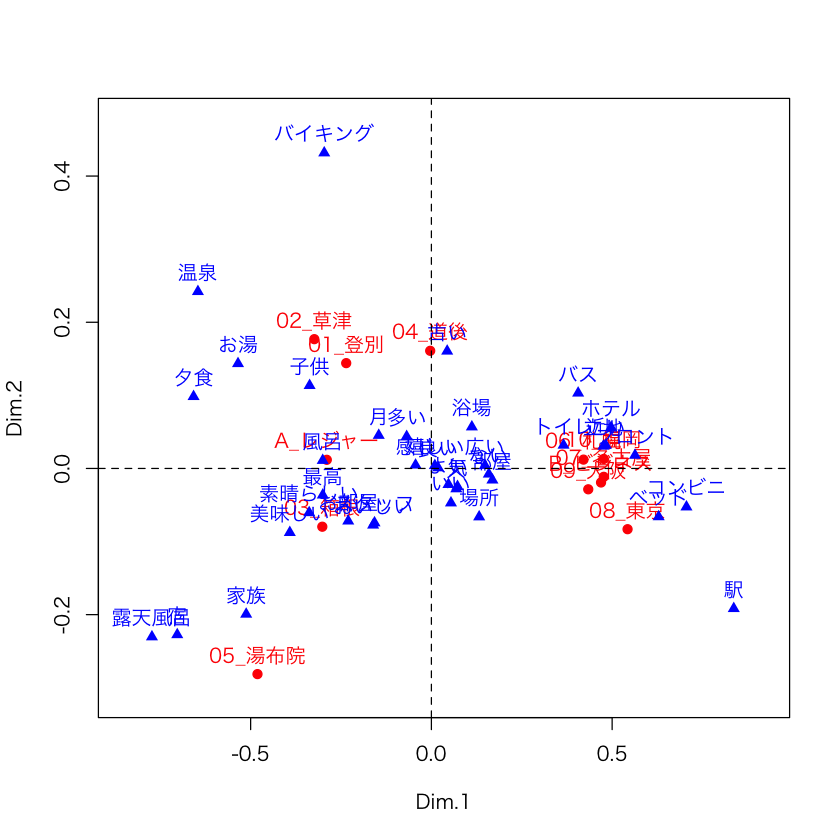

In [617]:
par(family = "HiraKakuProN-W3")

xlim <- range(c(row.coord[,1], col.coord[,1]))*1.1
ylim <- range(c(row.coord[,2], col.coord[,2]))*1.1

# Plot of rows
plot(row.coord, pch=19, col = "red", xlim = xlim, ylim = ylim)
text(row.coord, labels =rownames(row.coord), pos = 3, col ="red")

# plot off columns
points(col.coord, pch=17, col = "blue")
text(col.coord, labels =rownames(col.coord), pos = 3, col ="blue")
abline(v=0, h=0, lty = 2)

In [618]:
k <- res.svd$d^2
inertias <- round(k,4)  # イナーシャ(慣性)
k <- round(100*k / sum(k), 2)
inertias
k

[1] 0.1426 0.0107 0.0061 0.0022 0.0014 0.0010 0.0006 0.0006 0.0002 0.0000
[11] 0.0000 0.0000

[1] 86.14  6.46  3.71  1.36  0.84  0.63  0.39  0.34  0.14  0.00  0.00  0.00

## 付録 (主成分分析による可視化)

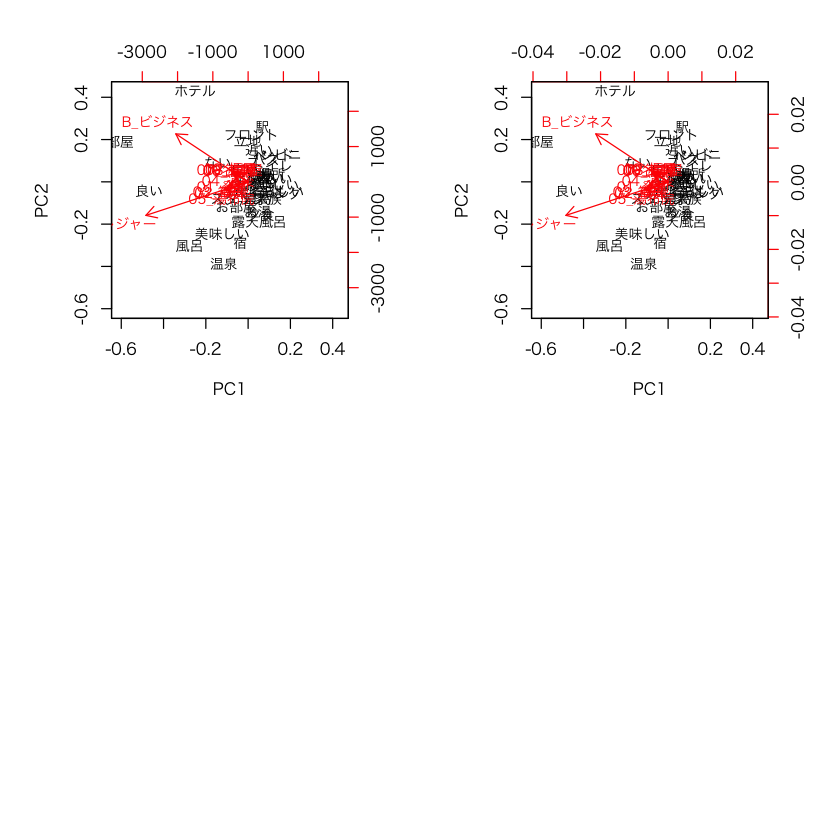

In [274]:
par(mfrow=c(2,2))
par(family = "HiraKakuProN-W3")

p1 <- prcomp(t(table.N))
biplot(p1)

table.P <- table.N / sum(table.N)
p2 <- prcomp(t(table.P))
biplot(p2)

## 付録 (対応分析の例)

In [606]:
# table.N <- matrix(
#     c(
#         395,2456,1758,
#         147,153,916,
#         694,327,1347
#     ),  byrow=T, nrow=3, ncol=3
# )

In [607]:
# colnames(table.N) <- c("強盗","詐欺","破壊")
# rownames(table.N) <- c("オスロ","中部地域","北部地域")

In [620]:
table.N <- matrix(
    c(
        3, 19, 39, 14, 10,
        1, 2, 13, 1, 12,
        6, 25, 49, 21, 29,
        3, 15, 41, 35, 26,
        10, 22, 47, 9, 26,
        3, 11, 25, 15, 34,
        1, 6, 14, 5, 11,
        0, 12, 34, 17, 23,
        2, 5, 11, 4, 7,
        2, 11, 37, 8, 20
    ),  byrow=T, nrow=10, ncol=5
)

In [621]:
colnames(table.N) <- c("A","B","C","D","E")
rownames(table.N) <- c("地質学", "生物化学", "科学", "動物学", "物理学", "工学", "微生物学", "植物学", "統計学", "数学")

In [626]:
# Observed counts
table.N

,A,B,C,D,E
地質学,3,19,39,14,10
生物化学,1,2,13,1,12
科学,6,25,49,21,29
動物学,3,15,41,35,26
物理学,10,22,47,9,26
工学,3,11,25,15,34
微生物学,1,6,14,5,11
植物学,0,12,34,17,23
統計学,2,5,11,4,7
数学,2,11,37,8,20


In [627]:
# row sum
row.sum <- apply(table.N, 1, sum)

# col sum
col.sum <- apply(table.N, 2, sum)

# Grand total
n <- sum(table.N)

In [628]:
# Expected counts
expected <- outer(row.sum, col.sum) / sum(table.N)
round(expected, 3)

,A,B,C,D,E
地質学,3.310,13.668,33.103,13.775,21.143
生物化学,1.129,4.663,11.294,4.700,7.214
科学,5.063,20.905,50.628,21.068,32.337
動物学,4.673,19.296,46.734,19.447,29.849
物理学,4.440,18.332,44.397,18.475,28.357
工学,3.427,14.151,34.271,14.261,21.889
微生物学,1.441,5.950,14.410,5.996,9.204
植物学,3.349,13.829,33.492,13.937,21.392
統計学,1.129,4.663,11.294,4.700,7.214
数学,3.038,12.543,30.377,12.641,19.402


In [629]:
#  Residuals
residuals <- (table.N - expected)/sqrt(expected)
residuals

,A,B,C,D,E
地質学,-0.1705494,1.44212994,1.02493481,0.06058878,-2.42339958
生物化学,-0.1217589,-1.23331878,0.50764883,-1.70661246,1.78211960
科学,0.4165142,0.89574503,-0.22882103,-0.01477987,-0.58676914
動物学,-0.7740628,-0.97807907,-0.83872122,3.52678214,-0.70454544
物理学,2.6388919,0.85677919,0.39066090,-2.20436097,-0.44257949
工学,-0.2307279,-0.83757687,-1.58371724,0.19560709,2.58849046
微生物学,-0.3673406,0.02060144,-0.10788954,-0.40683746,0.59216952
植物学,-1.8300946,-0.49187033,0.08769902,0.82041405,0.34767352
統計学,0.8192130,0.15591011,-0.08747410,-0.32277865,-0.07951715
数学,-0.5953815,-0.43560168,1.20168522,-1.30526352,0.13575959


In [630]:
# Standardized residuals
residuals <- residuals / sqrt(n)

# Number of dimensions
nb.axes <- min(nrow(residuals)-1, ncol(residuals)-1)

# Singular value decomposition
res.svd <- svd(residuals, nu = nb.axes, nv = nb.axes)
summary(res.svd)

  Length Class  Mode   
d  5     -none- numeric
u 40     -none- numeric
v 20     -none- numeric

In [631]:
sv <- res.svd$d[1:nb.axes] # singular value
u <-res.svd$u
v <- res.svd$v

In [632]:
# row mass
row.mass <- row.sum/n

# row coord = sv * u /sqrt(row.mass)
cc <- t(apply(u, 1, '*', sv)) # each row X sv
row.coord <- apply(cc, 2, '/', sqrt(row.mass))
rownames(row.coord) <- rownames(table.N)
colnames(row.coord) <- paste0("Dim.", 1:nb.axes)
head(round(row.coord, 3))

,Dim.1,Dim.2,Dim.3,Dim.4
地質学,0.076,0.303,0.088,-0.035
生物化学,0.180,-0.455,0.152,0.097
科学,0.038,0.073,-0.042,-0.044
動物学,-0.327,0.102,-0.065,0.069
物理学,0.316,0.027,-0.109,0.033
工学,-0.117,-0.292,-0.107,-0.057


In [633]:
# col mass
col.mass <- col.sum/n

# coordinates sv * v /sqrt(col.mass)
cc <- t(apply(v, 1, '*', sv))
col.coord <- apply(cc, 2, '/', sqrt(col.mass))
rownames(col.coord) <- colnames(table.N)
colnames(col.coord) <- paste0("Dim", 1:nb.axes)
head(round(col.coord, 3))

,Dim1,Dim2,Dim3,Dim4
A,0.478,0.072,-0.391,0.108
B,0.127,0.173,-0.033,-0.097
C,0.083,0.050,0.098,0.033
D,-0.390,0.139,-0.073,0.019
E,-0.032,-0.292,-0.024,-0.018


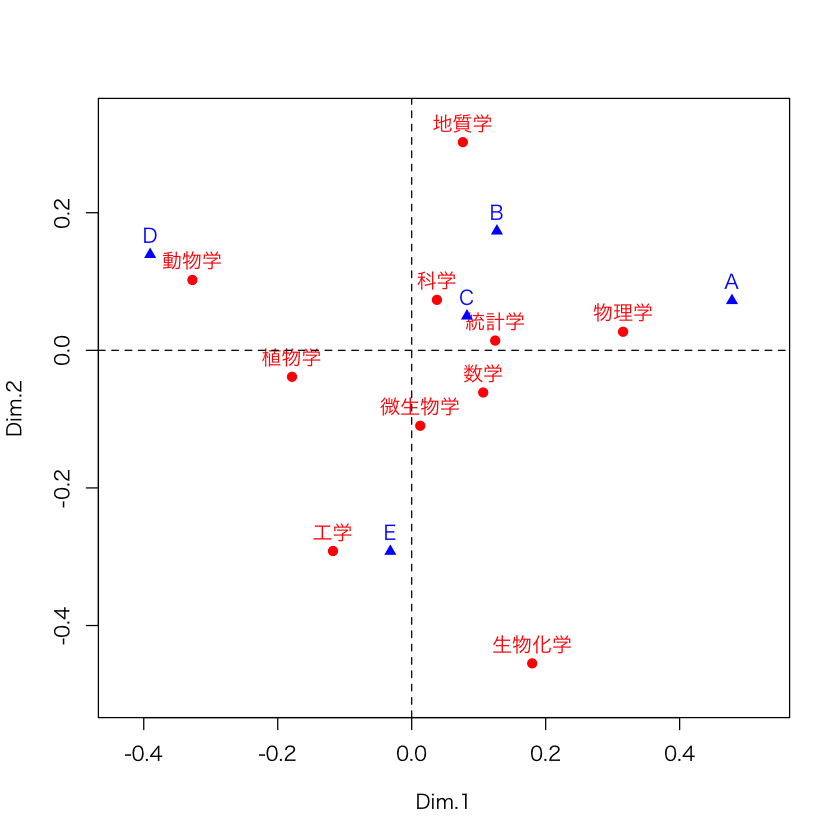

In [634]:
par(family = "HiraKakuProN-W3")

xlim <- range(c(row.coord[,1], col.coord[,1]))*1.1
ylim <- range(c(row.coord[,2], col.coord[,2]))*1.1

# Plot of rows
plot(row.coord, pch=19, col = "red", xlim = xlim, ylim = ylim)
text(row.coord, labels =rownames(row.coord), pos = 3, col ="red")

# plot off columns
points(col.coord, pch=17, col = "blue")
text(col.coord, labels =rownames(col.coord), pos = 3, col ="blue")
abline(v=0, h=0, lty = 2)

In [635]:
k <- res.svd$d^2
inertias <- round(k,4)  # イナーシャ(慣性)
k <- round(100*k / sum(k), 2)
inertias
k

[1] 0.0391 0.0304 0.0109 0.0025 0.0000

[1] 47.20 36.66 13.11  3.03  0.00